#  <font color='orange'>Goolam Fareed Bangie 1828201 Baby Cry Recognition</font>

## <font color='green'>Import Libraries </font>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

In [2]:
!pip install librosa

## <font color='purple'>Quick display of how librosa reading in files differ from the scipy wavfile package </font>

In [6]:
filename = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/fa8620d3-e7db-4101-aff0-28dbf0d96a5f-1434465485354-1.7-f-04-hu.wav'

In [7]:
import IPython.display as ipd
import librosa
import librosa.display

In [8]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)

<Figure size 1008x360 with 0 Axes>

In [5]:
from scipy.io import wavfile as wav
wave_sr,wave_audio = wav.read(filename)

In [6]:
print("Sample rate represented by librosa:",sample_rate)
print()
print("Sample rate represented by scipy:",wave_sr)

Sample rate represented by librosa: 22050

Sample rate represented by scipy: 8000


In [7]:
print("Audio wav file representation by librosa:\n",data)
print()
print("Audio wav file representation by scipy:\n",wave_audio)

Audio wav file representation by librosa:
 [0.         0.         0.         ... 0.03418675 0.01238723 0.00153627]

Audio wav file representation by scipy:
 [   0    0    0 ... 1816 3160  896]


##  <font color='red'>Comparing the two modules for audio reading and representation</font>
We know sampling rate refers to the number of samples of audio recorded every second, clearly librosa does much more sampling than scipy and thus the data represented by librosa will be more accurate.
The representation of the audio files also differs as librosa implements normalisation to the data whereas scipy does not. This normalisation is a key component in machine learning for improving accuracies and not giving biases to certain variables in the data.

# <font color='blue'>EDA</font>
Before reading in of the full data and splitting the data into training and test sets, some EDA will be done where we just plot the different baby cry types and give an audio bar to listen to each sound allowing the reader to hear the cries and see if they can identify key discrepancies in the cries. Lets do this alphabetically

### BELLY PAIN 😓

In [8]:
belly_pain = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/belly_pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431159262344-1.7-m-04-bp.wav'

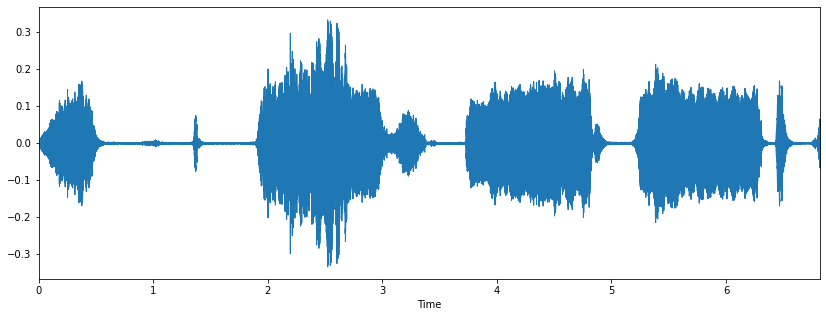

In [9]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(belly_pain)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(belly_pain)

### BURPING 🤢

In [10]:
burping = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/burping/af30880e-5f98-4dc0-b37a-be6b21fa0ba3-1431240072536-1.7-m-26-bu.wav'

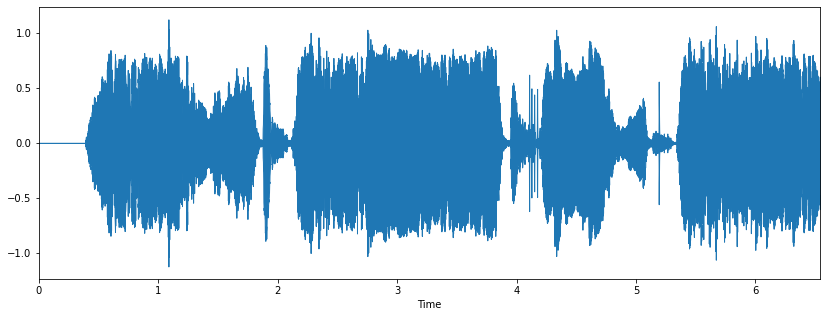

In [11]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(burping)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(burping)

### COLD_HOT 🥶 🥵

In [12]:
cold_hot = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/cold_hot/999bf14b-e417-4b44-b746-9253f81efe38-1430845035663-1.7-m-26-ch.wav'

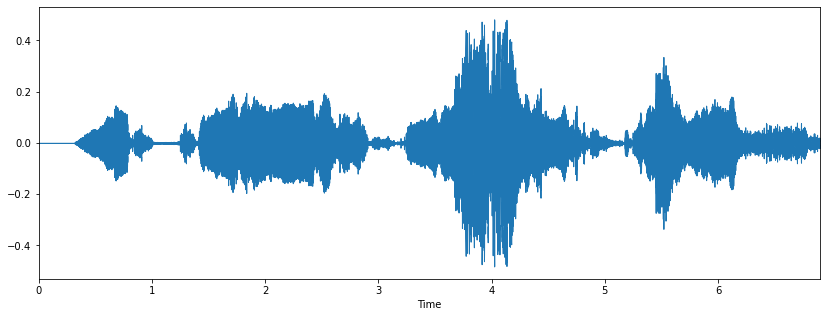

In [13]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(cold_hot)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(cold_hot)

### DISCOMFORT 🤕

In [14]:
discomfort = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/discomfort/837fd072-8704-4196-9ff1-1d2c07886e55-1432429478471-1.7-m-22-dc.wav'

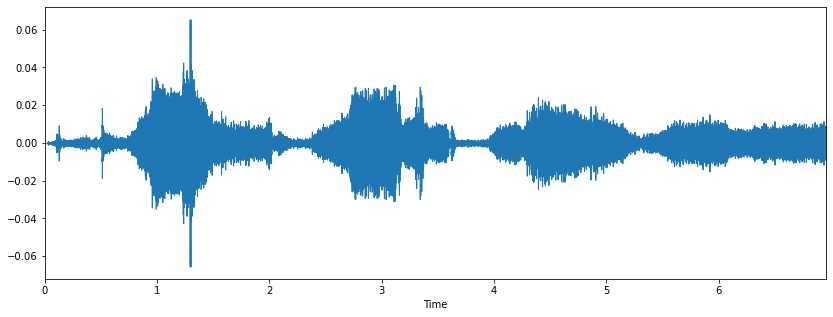

In [15]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(discomfort)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(discomfort)

### HUNGRY 🍕

In [16]:
hungry = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/3bb2445a-9ae9-4dc8-9a2e-86c696ffa405-1430124221551-1.7-m-26-hu.wav'

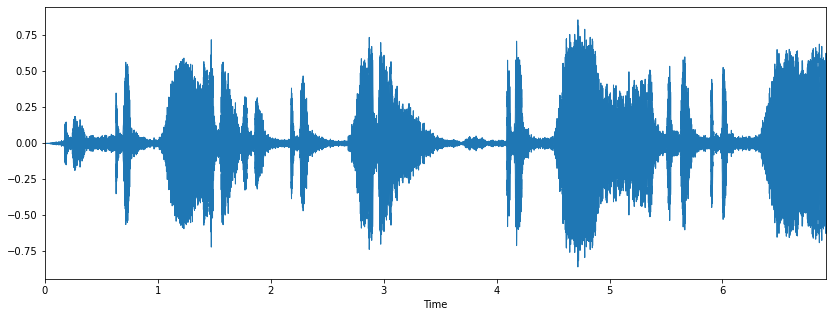

In [17]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(hungry)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(hungry)

### LONELY 🚶

In [18]:
lonely = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/lonely/999bf14b-e417-4b44-b746-9253f81efe38-1430972767565-1.7-m-26-lo.wav'

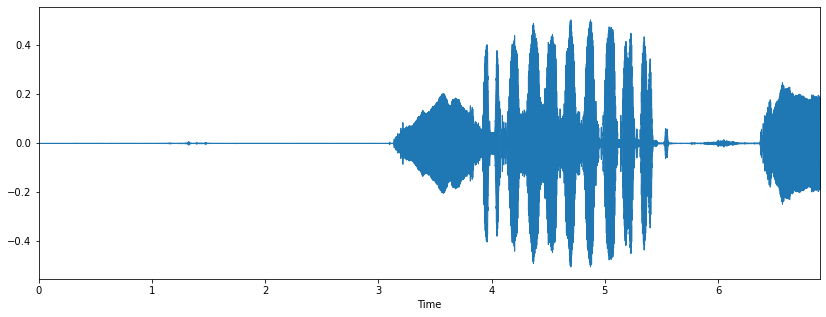

In [19]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(lonely)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(lonely)

### SCARED 😱

In [20]:
scared = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/scared/d6cda191-4962-4308-9a36-46d5648a95ed-1431700367302-1.7-m-04-sc.wav'

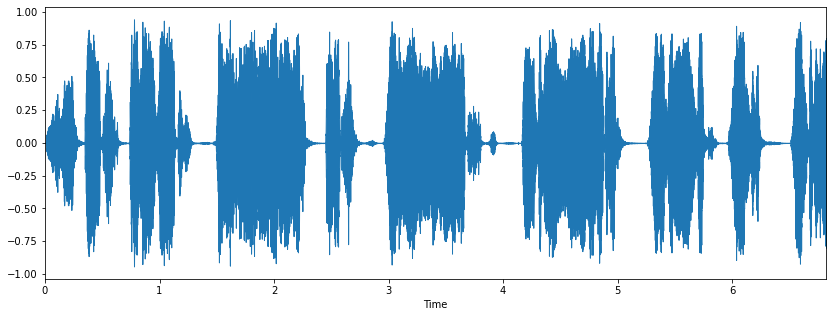

In [21]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(scared)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(scared)

### TIRED 🥱

In [22]:
tired = '/home/goolam/Desktop/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/tired/C421C6FE-DFEE-4080-8AEA-848E7CE4756B-1430548393-1.0-f-26-ti.wav'

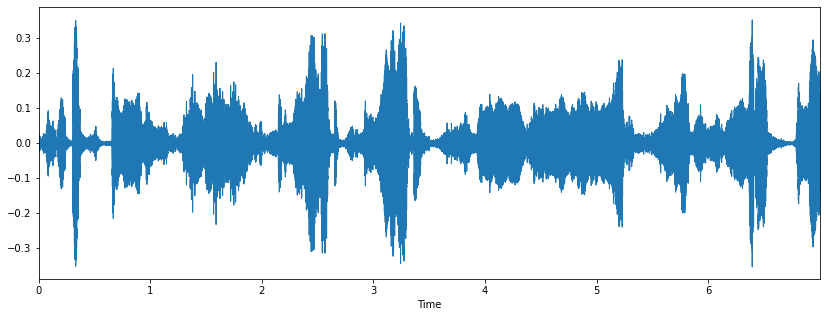

In [23]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(tired)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(tired)

In [9]:
metadata = pd.read_csv("data.csv")
metadata.shape

(457, 4)

## Extract Features from audio samples using MFCC(Mel-Frequency Cepstral Coefficients)

In [10]:
mfccs = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 292)


In [11]:
mfccs

array([[-5.25448792e+02, -5.25448792e+02, -5.25448792e+02, ...,
        -3.06759247e+02, -2.67364746e+02, -2.47207611e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.19132324e+02,  1.49350464e+02,  1.65837433e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -9.25008698e+01, -9.54472961e+01, -9.16925354e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.93608534e-01, -2.07537150e+00, -3.63801885e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.63826752e+00,  6.92449272e-01,  1.85649228e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.71287656e+00,  1.79366279e+00,  6.24358559e+00]], dtype=float32)

In [12]:
audio_dataset_path = '/home/goolam/Documents/Research/donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/'

In [13]:
def feature_extractor(file):
    audio,sampleRate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sampleRate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [29]:
from tqdm import tqdm
extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["Folder"])+'/',str(row["FileName"]))
    final_label = row["ClassName"]
    data = feature_extractor(file_name)
    extracted_features.append([data,final_label])

457it [01:43,  4.41it/s]


In [30]:
df = pd.DataFrame(extracted_features,columns=['feature','class'])
df.head()

,feature,class
0,"[-497.25443, 110.5298, -51.0884, -15.25888, 11...",belly pain
1,"[-497.26553, 151.22801, -56.617985, -1.1580331...",belly pain
2,"[-421.2681, 153.3781, -55.931305, -7.050015, 6...",belly pain
3,"[-383.0191, 164.00577, -70.79439, -8.87635, 8....",belly pain
4,"[-310.78342, 171.10025, -66.29349, 4.647664, 1...",belly pain


In [31]:
df.shape

(457, 2)

In [32]:
X = np.array(df['feature'].tolist())
y = np.array(df['class'].tolist())

In [33]:
X.shape

(457, 40)

In [34]:
y.shape

(457,)

In [35]:
actual_data = pd.DataFrame(X)
actual_data['y'] = y
display(actual_data)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,y
0,-497.254425,110.529800,-51.088402,-15.258880,11.180784,-27.102716,-11.599257,5.565383,-11.999115,-6.527438,...,-3.191859,4.268577,4.800620,0.700305,1.264367,1.461348,-1.260979,-3.392854,-3.208590,belly pain
1,-497.265533,151.228012,-56.617985,-1.158033,13.722064,-32.784672,-2.686177,-6.087936,-27.121290,-0.703470,...,-4.775182,-1.438087,-1.844114,-2.590125,2.512982,-0.722718,-0.710355,6.860031,3.718348,belly pain
2,-421.268097,153.378098,-55.931305,-7.050015,6.698253,-39.872841,-8.000626,-4.908268,-26.123381,-3.500248,...,-5.239836,0.278538,-0.378186,-3.676054,0.928189,-1.384313,-4.262055,0.097651,-1.323961,belly pain
3,-383.019104,164.005768,-70.794388,-8.876350,8.333994,-43.951965,-6.623555,-6.927271,-32.642754,-1.098698,...,-1.302364,4.671277,3.410244,-1.810743,2.432891,-0.551111,-3.342902,2.755553,0.363078,belly pain
4,-310.783417,171.100250,-66.293488,4.647664,11.888374,-51.270264,-10.478214,-9.711042,-33.379539,-0.175551,...,-1.539917,6.007534,3.985867,-2.547097,2.666921,0.556738,-1.873884,2.926424,-1.015233,belly pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-547.109924,85.787682,-54.556080,-1.215064,26.273918,-19.206804,-8.953623,4.045562,-12.391232,-2.307445,...,-3.055780,-1.665192,-0.911030,-2.813639,-2.188597,-1.146872,-1.734566,-1.465946,-1.856618,tired
453,-380.281525,61.908169,-68.777855,-25.008135,2.249540,-22.717060,0.809233,12.930043,-5.042687,0.563287,...,-1.733017,-1.895663,0.211032,-1.417307,-0.087852,1.354705,-1.715406,-3.558705,-1.893241,tired
454,-325.595062,96.541084,-102.964188,-34.545315,1.859985,-26.620785,7.321969,2.375968,-15.837572,13.220121,...,-2.925442,-2.362347,-1.701289,-1.986145,2.334829,0.623796,-0.922660,1.976749,-0.803467,tired
455,-329.682159,143.964539,-114.403893,-1.551438,15.247842,-61.727848,5.574963,19.927479,-30.014479,-1.832471,...,-3.704837,-0.372669,-1.022703,-0.961422,3.263485,-0.734838,-1.009032,3.073335,-0.490442,tired


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [37]:
X_train.shape

(365, 40)

In [38]:
X_test.shape

(92, 40)

In [39]:
y_train.shape
j = y_train
y_train = np.array(pd.get_dummies(y_train))
y_train.shape

(365, 5)

In [40]:
y_test.shape
y_test = np.array(pd.get_dummies(y_test))
y_test.shape

(92, 5)

## Model Creation

In [14]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [16]:
num_labels = y_test.shape[1]

NameError: name 'y_test' is not defined

In [44]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [46]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [47]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 400
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/400
12/12 [==============================] - 3s 14ms/step - loss: 29.7249 - accuracy: 0.6192 - val_loss: 19.7858 - val_accuracy: 0.8370

Epoch 00001: val_loss improved from inf to 19.78578, saving model to audio_classification.hdf5
Epoch 2/400
12/12 [==============================] - 0s 3ms/step - loss: 22.2319 - accuracy: 0.7425 - val_loss: 10.0198 - val_accuracy: 0.8370

Epoch 00002: val_loss improved from 19.78578 to 10.01979, saving model to audio_classification.hdf5
Epoch 3/400
12/12 [==============================] - 0s 3ms/step - loss: 15.2796 - accuracy: 0.6411 - val_loss: 5.0076 - val_accuracy: 0.8370

Epoch 00003: val_loss improved from 10.01979 to 5.00758, saving model to audio_classification.hdf5
Epoch 4/400
12/12 [==============================] - 0s 3ms/step - loss: 12.7205 - accuracy: 0.6493 - val_loss: 4.1270 - val_accuracy: 0.8370

Epoch 00004: val_loss improved from 5.00758 to 4.12705, saving model to audio_classification.hdf5
Epoch 5/400
12/12 [==============


Epoch 00040: val_loss improved from 0.89041 to 0.82148, saving model to audio_classification.hdf5
Epoch 41/400
12/12 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.8027 - val_loss: 0.8245 - val_accuracy: 0.8370

Epoch 00041: val_loss did not improve from 0.82148
Epoch 42/400
12/12 [==============================] - 0s 3ms/step - loss: 0.9471 - accuracy: 0.7863 - val_loss: 0.8519 - val_accuracy: 0.8370

Epoch 00042: val_loss did not improve from 0.82148
Epoch 43/400
12/12 [==============================] - 0s 3ms/step - loss: 0.9639 - accuracy: 0.7973 - val_loss: 0.8567 - val_accuracy: 0.8370

Epoch 00043: val_loss did not improve from 0.82148
Epoch 44/400
12/12 [==============================] - 0s 2ms/step - loss: 0.9119 - accuracy: 0.8164 - val_loss: 0.8649 - val_accuracy: 0.8370

Epoch 00044: val_loss did not improve from 0.82148
Epoch 45/400
12/12 [==============================] - 0s 2ms/step - loss: 0.9963 - accuracy: 0.8027 - val_loss: 0.8407 - val_

12/12 [==============================] - 0s 3ms/step - loss: 0.7515 - accuracy: 0.8274 - val_loss: 0.7702 - val_accuracy: 0.8370

Epoch 00081: val_loss did not improve from 0.74505
Epoch 82/400
12/12 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.8329 - val_loss: 0.7616 - val_accuracy: 0.8370

Epoch 00082: val_loss did not improve from 0.74505
Epoch 83/400
12/12 [==============================] - 0s 3ms/step - loss: 0.7456 - accuracy: 0.8301 - val_loss: 0.7449 - val_accuracy: 0.8370

Epoch 00083: val_loss improved from 0.74505 to 0.74491, saving model to audio_classification.hdf5
Epoch 84/400
12/12 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.8329 - val_loss: 0.7566 - val_accuracy: 0.8370

Epoch 00084: val_loss did not improve from 0.74491
Epoch 85/400
12/12 [==============================] - 0s 3ms/step - loss: 0.7493 - accuracy: 0.8356 - val_loss: 0.7621 - val_accuracy: 0.8370

Epoch 00085: val_loss did not improve from 0.74

12/12 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.8356 - val_loss: 0.7158 - val_accuracy: 0.8370

Epoch 00162: val_loss did not improve from 0.70384
Epoch 163/400
12/12 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.8356 - val_loss: 0.7195 - val_accuracy: 0.8370

Epoch 00163: val_loss did not improve from 0.70384
Epoch 164/400
12/12 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.8356 - val_loss: 0.7209 - val_accuracy: 0.8370

Epoch 00164: val_loss did not improve from 0.70384
Epoch 165/400
12/12 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.8356 - val_loss: 0.7247 - val_accuracy: 0.8370

Epoch 00165: val_loss did not improve from 0.70384
Epoch 166/400
12/12 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.8356 - val_loss: 0.7305 - val_accuracy: 0.8370

Epoch 00166: val_loss did not improve from 0.70384
Epoch 167/400
12/12 [==================

12/12 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.8356 - val_loss: 0.8003 - val_accuracy: 0.8370

Epoch 00246: val_loss did not improve from 0.70384
Epoch 247/400
12/12 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.8356 - val_loss: 0.8197 - val_accuracy: 0.8370

Epoch 00247: val_loss did not improve from 0.70384
Epoch 248/400
12/12 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.8356 - val_loss: 0.8176 - val_accuracy: 0.8370

Epoch 00248: val_loss did not improve from 0.70384
Epoch 249/400
12/12 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.8356 - val_loss: 0.8238 - val_accuracy: 0.8370

Epoch 00249: val_loss did not improve from 0.70384
Epoch 250/400
12/12 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.8356 - val_loss: 0.8346 - val_accuracy: 0.8370

Epoch 00250: val_loss did not improve from 0.70384
Epoch 251/400
12/12 [==================

12/12 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.8329 - val_loss: 1.1408 - val_accuracy: 0.8370

Epoch 00330: val_loss did not improve from 0.70384
Epoch 331/400
12/12 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.8356 - val_loss: 1.1341 - val_accuracy: 0.8370

Epoch 00331: val_loss did not improve from 0.70384
Epoch 332/400
12/12 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.8329 - val_loss: 1.1042 - val_accuracy: 0.8370

Epoch 00332: val_loss did not improve from 0.70384
Epoch 333/400
12/12 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.8384 - val_loss: 1.1228 - val_accuracy: 0.8370

Epoch 00333: val_loss did not improve from 0.70384
Epoch 334/400
12/12 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.8384 - val_loss: 1.1637 - val_accuracy: 0.8370

Epoch 00334: val_loss did not improve from 0.70384
Epoch 335/400
12/12 [==================

In [48]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100,'%')

83.69565010070801 %


In [49]:
predictions = model.predict(X_test)

In [50]:
predictions = np.argmax(predictions, axis=1)

In [51]:
print(predictions)
print(y_test)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 

### CNN

In [17]:
temp = metadata
temp.head()

,FileName,Folder,ClassID,ClassName
0,549a46d8-9c84-430e-ade8-97eae2bef787-143013077...,belly pain,0,belly pain
1,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...,belly pain,0,belly pain
2,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...,belly pain,0,belly pain
3,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain
4,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...,belly pain,0,belly pain


In [18]:
from tqdm import tqdm
audio_data = list()
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["Folder"])+'/',str(row["FileName"]))
    audio_data.append(librosa.load(file_name))

457it [00:54,  8.33it/s]


In [19]:
audio_data = np.array(audio_data)
temp['audio_waves'] = audio_data[:,0]
temp['samplerate'] = audio_data[:,1]
temp.head()

<ipython-input-19-7db5810ecac1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  audio_data = np.array(audio_data)


,FileName,Folder,ClassID,ClassName,audio_waves,samplerate
0,549a46d8-9c84-430e-ade8-97eae2bef787-143013077...,belly pain,0,belly pain,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050
1,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...,belly pain,0,belly pain,"[1.0455078e-05, 0.00020626496, 0.00032086764, ...",22050
2,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...,belly pain,0,belly pain,"[-0.0012119983, -0.0014591558, -0.0012586393, ...",22050
3,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain,"[-0.0003840309, -0.00075927255, -0.0006973152,...",22050
4,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...,belly pain,0,belly pain,"[0.0034148805, 0.0023093217, -0.0010149234, -0...",22050


In [20]:
bit_lengths = list()
for i in range(temp.shape[0]):
    bit_lengths.append(len(temp['audio_waves'].iloc[i]))
bit_lengths = np.array(bit_lengths)
temp['bit_lengths'] = bit_lengths
temp['seconds_length'] = temp['bit_lengths']/temp['samplerate']
temp.head()

,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
0,549a46d8-9c84-430e-ade8-97eae2bef787-143013077...,belly pain,0,belly pain,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,151263,6.86
1,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...,belly pain,0,belly pain,"[1.0455078e-05, 0.00020626496, 0.00032086764, ...",22050,154350,7.0
2,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...,belly pain,0,belly pain,"[-0.0012119983, -0.0014591558, -0.0012586393, ...",22050,154350,7.0
3,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain,"[-0.0003840309, -0.00075927255, -0.0006973152,...",22050,154350,7.0
4,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...,belly pain,0,belly pain,"[0.0034148805, 0.0023093217, -0.0010149234, -0...",22050,154350,7.0


In [21]:
temp = temp.sample(frac=1).reset_index(drop=True)
temp.head()

,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
0,e4051e62-d21d-4bb8-a235-fd7e859ad787-143074061...,hungry,3,hungry,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,153468,6.96
1,e1e640e2-78cb-4cb7-9ccc-93813bfc251c-143073864...,hungry,3,hungry,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,152586,6.92
2,F24DE44B-762C-4149-AC92-96A5E57ED118-143081693...,hungry,3,hungry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,154350,7.0
3,0c8f14a9-6999-485b-97a2-913c1cbf099c-143076037...,hungry,3,hungry,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,153027,6.94
4,89964233-cbdb-4f34-a819-5f4b5ce3f5f5-143004985...,hungry,3,hungry,"[-2.4249114e-06, -5.4460074e-06, -3.1923075e-0...",22050,152586,6.92


In [22]:
hungryData = temp[temp.ClassName=='hungry']
temp = temp.drop(temp[temp.ClassName == 'hungry'].index)
display(temp.head())
display(hungryData.head())

,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
12,cecd525b-18fd-49e3-b2b9-dfb08b93ad95-143011002...,tired,4,tired,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,153027,6.94
18,f5b29377-7cd6-4688-942c-5a07add39dc5-143748026...,discomfort,2,discomfort,"[1.6133342e-06, 3.9948486e-06, 2.2130685e-06, ...",22050,155673,7.06
21,C421C6FE-DFEE-4080-8AEA-848E7CE4756B-143054833...,belly pain,0,belly pain,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,154350,7.0
25,999bf14b-e417-4b44-b746-9253f81efe38-143084501...,discomfort,2,discomfort,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,152145,6.9
36,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain,"[-0.0003840309, -0.00075927255, -0.0006973152,...",22050,154350,7.0


,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
0,e4051e62-d21d-4bb8-a235-fd7e859ad787-143074061...,hungry,3,hungry,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,153468,6.96
1,e1e640e2-78cb-4cb7-9ccc-93813bfc251c-143073864...,hungry,3,hungry,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,152586,6.92
2,F24DE44B-762C-4149-AC92-96A5E57ED118-143081693...,hungry,3,hungry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,154350,7.0
3,0c8f14a9-6999-485b-97a2-913c1cbf099c-143076037...,hungry,3,hungry,"[1.2662281e-06, 1.4249257e-06, -1.5742867e-08,...",22050,153027,6.94
4,89964233-cbdb-4f34-a819-5f4b5ce3f5f5-143004985...,hungry,3,hungry,"[-2.4249114e-06, -5.4460074e-06, -3.1923075e-0...",22050,152586,6.92


In [23]:
print(hungryData.seconds_length.max())

7.06


In [24]:
print(temp.seconds_length.max())

7.06


In [25]:
min_Hbits = np.min(hungryData['bit_lengths'])
print(min_Hbits)
min_Hseconds = np.min(hungryData['seconds_length'])
print(min_Hseconds)

143766
6.52


In [26]:
min_bits = np.min(temp['bit_lengths'])
print(min_bits)
min_seconds = np.min(temp['seconds_length'])
print(min_seconds)

143766
6.52


In [27]:
num_samples = 6000
#cries = [0,1,2,3]
generated_audio_waves = list()
generated_audio_labels = list()
for i in tqdm(range(num_samples)):
    try:
        #index = np.random.choice(cries)
        #d = temp[temp.ClassID==index]
        chosen_file = np.random.choice(temp['FileName'].values)
        #print(chosen_file)
        chosen_initial = np.random.choice(np.arange(0,temp[temp['FileName']==chosen_file]['bit_lengths'].values-min_bits))
        generated_audio_waves.append(temp[temp['FileName']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+min_bits])
        
        generated_audio_labels.append(temp[temp['FileName']==chosen_file]['ClassName'].values)
    except ValueError:
        continue
for j in tqdm(range(hungryData.shape[0]*5)):
    try:
            k = j%hungryData.shape[0]
            chosen_file = hungryData.iloc[k].FileName
            #print(chosen_file)
            chosen_initial = np.random.choice(np.arange(0,hungryData[hungryData['FileName']==chosen_file]['bit_lengths'].values-min_bits))
            generated_audio_waves.append(hungryData[hungryData['FileName']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+min_bits])

            generated_audio_labels.append(hungryData[hungryData['FileName']==chosen_file]['ClassName'].values)
    except ValueError:
        continue
        
generated_audio_waves = np.array(generated_audio_waves)
generated_audio_labels = np.array(generated_audio_labels)

100%|██████████| 1910/1910 [00:02<00:00, 795.71it/s]


In [28]:
generated_audio_waves.shape

(7818, 143766)

In [29]:
np.unique(generated_audio_labels,return_counts=True)

(array(['belly pain', 'burping', 'discomfort', 'hungry', 'tired'],
       dtype=object),
 array([1265,  659, 2108, 1905, 1881]))

In [62]:
!pip install python_speech_features 

^C
Traceback (most recent call last):
  File "/home/goolam/anaconda3/bin/pip", line 11, in <module>
    sys.exit(main())
  File "/home/goolam/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 71, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/home/goolam/anaconda3/lib/python3.8/site-packages/pip/_internal/commands/__init__.py", line 96, in create_command
    module = importlib.import_module(module_path)
  File "/home/goolam/anaconda3/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<froz

In [30]:
from python_speech_features import mfcc
mfcc_features = list()
for i in tqdm(range(len(generated_audio_waves))):
    mfcc_features.append(mfcc(generated_audio_waves[i]))
mfcc_features = np.array(mfcc_features)

100%|██████████| 7818/7818 [04:34<00:00, 28.52it/s]


In [31]:
print(generated_audio_waves.shape)
print(mfcc_features.shape)
print(np.unique(generated_audio_labels,return_counts=True))

(7818, 143766)
(7818, 898, 13)
(array(['belly pain', 'burping', 'discomfort', 'hungry', 'tired'],
      dtype=object), array([1265,  659, 2108, 1905, 1881]))


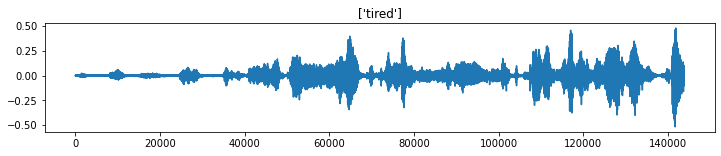

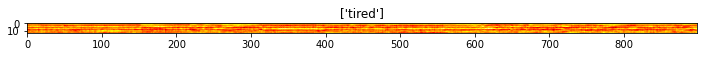

In [32]:
plt.figure(figsize=(12,2))
plt.plot(generated_audio_waves[30])
plt.title(generated_audio_labels[30])
plt.show()

plt.figure(figsize=(12, 2))
plt.imshow(mfcc_features[30].T, cmap='hot')
plt.title(generated_audio_labels[30])
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(generated_audio_labels)
label_encoded = label_encoded[:, np.newaxis]
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

/home/goolam/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
print(np.unique(label_encoded,return_counts=True))

(array([0, 1, 2, 3, 4]), array([1265,  659, 2108, 1905, 1881]))


In [35]:
from sklearn.model_selection import train_test_split
X = mfcc_features
y = generated_audio_labels
X = (X-X.min())/(X.max()-X.min())
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded, test_size=0.2,stratify=y)

In [36]:
print(np.unique(y_test))

[0 1 2 3 4]


In [37]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer


def generate_class_weights(class_series, multi_class=True, one_hot_encoded=False):
    if multi_class:
    # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
        if one_hot_encoded:
            class_series = np.argmax(class_series, axis=1)
  
    # Compute class weights with sklearn method
        class_labels = np.unique(class_series)
        class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
        return dict(zip(class_labels, class_weights))
    else:
    # It is neccessary that the multi-label values are one-hot encoded
        mlb = None
        if not one_hot_encoded:
            mlb = MultiLabelBinarizer()
            class_series = mlb.fit_transform(class_series)

        n_samples = len(class_series)
        n_classes = len(class_series[0])

    # Count each class frequency
        class_count = [0] * n_classes
        for classes in class_series:
            for index in range(n_classes):
                if classes[index] != 0:
                    class_count[index] += 1
    
    # Compute class weights using balanced method
        class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
        class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
        return dict(zip(class_labels, class_weights))

In [38]:
class_weights = generate_class_weights(y_train[:,0])

In [39]:
print(class_weights)

{0: 1.2359683794466403, 1: 2.3734345351043644, 2: 0.7418742586002373, 3: 0.820734908136483, 4: 0.8310963455149502}


In [40]:
y_train = np.array(pd.get_dummies(y_train[:,0]))
y_test = np.array(pd.get_dummies(y_test[:,0]))

In [41]:
X_train.shape

(6254, 898, 13)

In [42]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [43]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test.shape)

(6254, 898, 13, 1)
(1564, 898, 13, 1)


In [44]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 898, 13, 16)       160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 898, 13, 32)       4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 449, 6, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 449, 6, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 86208)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11034752  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [47]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/8
196/196 [==============================] - 124s 351ms/step - loss: 1.5855 - accuracy: 0.2542
Epoch 2/8
196/196 [==============================] - 67s 342ms/step - loss: 1.4952 - accuracy: 0.2814
Epoch 3/8
196/196 [==============================] - 67s 343ms/step - loss: 1.3957 - accuracy: 0.3395
Epoch 4/8
196/196 [==============================] - 68s 345ms/step - loss: 1.3009 - accuracy: 0.4057
Epoch 5/8
196/196 [==============================] - 68s 349ms/step - loss: 1.2285 - accuracy: 0.4610
Epoch 6/8
196/196 [==============================] - 69s 352ms/step - loss: 1.1066 - accuracy: 0.5301
Epoch 7/8
196/196 [==============================] - 67s 341ms/step - loss: 0.9588 - accuracy: 0.6068
Epoch 8/8
196/196 [==============================] - 65s 332ms/step - loss: 0.8872 - accuracy: 0.6324


In [48]:
test_loss,test_acc = model.evaluate(X_test,y_test,verbose=2)

49/49 - 4s - loss: 0.6034 - accuracy: 0.7781


In [49]:
predictions = model.predict(X_test)

In [50]:
predictions = np.argmax(predictions, axis=1)
print(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)
print(y_test)

[1 0 1 ... 0 3 2]
[[3]
 [0]
 [3]
 ...
 [0]
 [3]
 [2]]


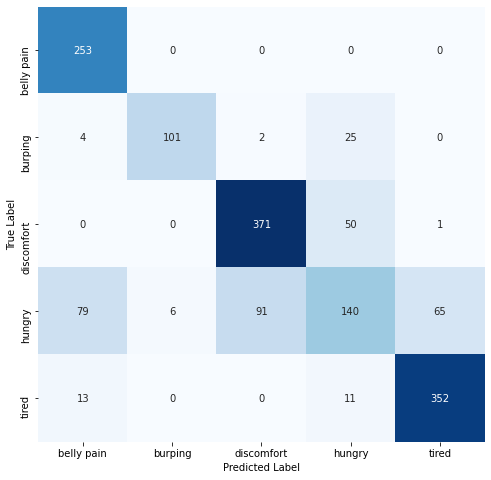

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## VGG-13

In [52]:
print(X_train.shape)

(6254, 898, 13, 1)


In [53]:
print(X_test.shape)

(1564, 898, 13, 1)


In [56]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model

In [57]:
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(X_train)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
output = Dense(units = 5, activation ='softmax')(x)

model = Model (inputs=input, outputs =output)
model.summary()

ResourceExhaustedError: OOM when allocating tensor with shape[6254,898,13,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Conv2D]